# 机器学习工程师纳米学位
## 模型评价与验证
## 项目 1: 预测波士顿房价


欢迎来到机器学习工程师纳米学位的第一个项目！在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能来让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以**'练习'**开始的标题表示接下来的内容中有需要你必须实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以**'TODO'**标出。请仔细阅读所有的提示！

除了实现代码外，你还**必须**回答一些与项目和实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。你的项目将会根据你对问题的回答和撰写代码所实现的功能来进行评分。

>**提示：**Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

## 开始
在这个项目中，你将利用马萨诸塞州波士顿郊区的房屋信息数据训练和测试一个模型，并对模型的性能和预测能力进行测试。通过该数据训练后的好的模型可以被用来对房屋做特定预测---尤其是对房屋的价值。对于房地产经纪等人的日常工作来说，这样的预测模型被证明非常有价值。

此项目的数据集来自[UCI机器学习知识库](https://archive.ics.uci.edu/ml/datasets/Housing)。波士顿房屋这些数据于1978年开始统计，共506个数据点，涵盖了麻省波士顿不同郊区房屋14种特征的信息。本项目对原始数据集做了以下处理：
- 有16个`'MEDV'` 值为50.0的数据点被移除。 这很可能是由于这些数据点包含**遗失**或**看不到的值**。
- 有1个数据点的 `'RM'` 值为8.78. 这是一个异常值，已经被移除。
- 对于本项目，房屋的`'RM'`， `'LSTAT'`，`'PTRATIO'`以及`'MEDV'`特征是必要的，其余不相关特征已经被移除。
- `'MEDV'`特征的值已经过必要的数学转换，可以反映35年来市场的通货膨胀效应。

运行下面区域的代码以载入波士顿房屋数据集，以及一些此项目所需的Python库。如果成功返回数据集的大小，表示数据集已载入成功。

In [2]:
# Import libraries necessary for this project
# 载入此项目所需要的库
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.model_selection import ShuffleSplit

# Pretty display for notebooks
# 让结果在notebook中显示
%matplotlib inline

# Load the Boston housing dataset
# 载入波士顿房屋的数据集
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
# 完成
print ("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## 分析数据
在项目的第一个部分，你会对波士顿房地产数据进行初步的观察并给出你的分析。通过对数据的探索来熟悉数据可以让你更好地理解和解释你的结果。

由于这个项目的最终目标是建立一个预测房屋价值的模型，我们需要将数据集分为**特征(features)**和**目标变量(target variable)**。**特征** `'RM'`， `'LSTAT'`，和 `'PTRATIO'`，给我们提供了每个数据点的数量相关的信息。**目标变量**：` 'MEDV'`，是我们希望预测的变量。他们分别被存在`features`和`prices`两个变量名中。

## 练习：基础统计运算
你的第一个编程练习是计算有关波士顿房价的描述统计数据。我们已为你导入了` numpy `，你需要使用这个库来执行必要的计算。这些统计数据对于分析模型的预测结果非常重要的。
在下面的代码中，你要做的是：
- 计算`prices`中的`'MEDV'`的最小值、最大值、均值、中值和标准差；
- 将运算结果储存在相应的变量中。

In [3]:
# TODO: Minimum price of the data
#目标：计算价值的最小值
minimum_price = min(prices)

# TODO: Maximum price of the data
#目标：计算价值的最大值
maximum_price = max(prices)

# TODO: Mean price of the data
#目标：计算价值的平均值
mean_price = np.mean(prices)

# TODO: Median price of the data
#目标：计算价值的中值
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
#目标：计算价值的标准差
std_price = np.std(prices)

# Show the calculated statistics
#目标：输出计算的结果
print ("Statistics for Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### 问题1 - 特征观察

如前文所述，本项目中我们关注的是其中三个值:`'RM'`、`'LSTAT'` 和`'PTRATIO'`，对每一个数据点:
- `'RM'` 是该地区中每个房屋的平均房间数量；
- `'LSTAT'` 是指该地区有多少百分比的房东属于是低收入阶层（有工作但收入微薄）；
- `'PTRATIO'` 是该地区的中学和小学里，学生和老师的数目比（`学生/老师`）。

_凭直觉，上述三个特征中对每一个来说，你认为增大该特征的数值，`'MEDV'`的值会是**增大**还是**减小**呢？每一个答案都需要你给出理由。_

**提示：**你预期一个`'RM'` 值是6的房屋跟`'RM'` 值是7的房屋相比，价值更高还是更低呢？

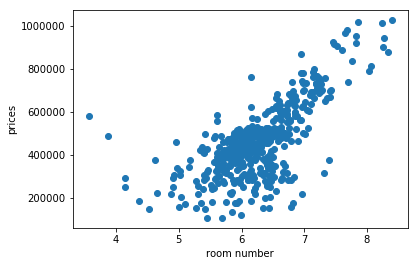

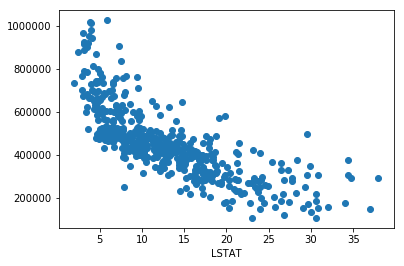

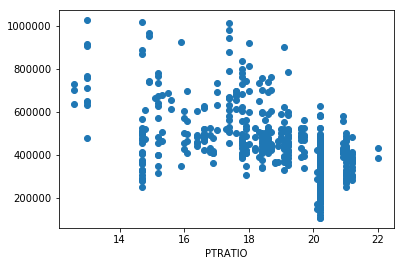

In [4]:
#imort numpy as np
import matplotlib.pyplot as plt
prices = data['MEDV']

rm = data['RM']
plt.ylabel('prices')
plt.xlabel('room number')
plt.scatter(rm,prices)
plt.show()

lstat = data['LSTAT']
plt.xlabel('LSTAT')
plt.scatter(lstat,prices)
plt.show()

ptratio = data['PTRATIO']
plt.xlabel('PTRATIO')
plt.scatter(ptratio,prices)
plt.show()

**回答: **
①我认为增大'RM'的数值，'MEDV'的值会增大。理由：该地区中每个房屋的平均房间数量越多，说明房子越大，房屋的成本越高，因此价格越高。
②我认为增大'LSTAT' 的数值，'MEDV'的值会减小。理由：该地区房东属于是低收入阶层（有工作但收入微薄）越多，说明穷人越多，价格越低。
③我认为增大'PTRATIO'的数值，'MEDV'的值既不会增大也不会减小。理由：该地区的中学和小学里，学生和老师的数目比（学生/老师）越大，说明每个老师教授的学生数目越多，因此反映出教育资源的相对匮乏，价格应该越低；而另一方面，学生数量越多，会使学区房价格上涨，二者相互制约使得价格不会有太大浮动。

我认为一个'RM' 值是6的房屋跟'RM' 值是7的房屋相比，价值更低。
理由：有6间房间的房子会比有7间房间的房子小，成本相对更低一些因此会更便宜。

## 建模
在项目的第二部分中，你需要了解必要的工具和技巧来让你的模型进行预测。用这些工具和技巧对每一个模型的表现做精确的衡量可以极大地增强你预测的信心。

### 练习：定义衡量标准
如果不能对模型的训练和测试的表现进行量化地评估，我们就很难衡量模型的好坏。通常我们会定义一些衡量标准，这些标准可以通过对某些误差或者拟合程度的计算来得到。在这个项目中，你将通过运算[*决定系数*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination) R<sup>2</sup> 来量化模型的表现。模型的决定系数是回归分析中十分常用的统计信息，经常被当作衡量模型预测能力好坏的标准。

R<sup>2</sup>的数值范围从0至1，表示**目标变量**的预测值和实际值之间的相关程度平方的百分比。一个模型的R<sup>2</sup> 值为0还不如直接用**平均值**来预测效果好；而一个R<sup>2</sup> 值为1的模型则可以对目标变量进行完美的预测。从0至1之间的数值，则表示该模型中目标变量中有百分之多少能够用**特征**来解释。_模型也可能出现负值的R<sup>2</sup>，这种情况下模型所做预测有时会比直接计算目标变量的平均值差很多。_

在下方代码的 `performance_metric` 函数中，你要实现：
- 使用 `sklearn.metrics` 中的 `r2_score` 来计算 `y_true` 和 `y_predict`的R<sup>2</sup>值，作为对其表现的评判。
- 将他们的表现评分储存到`score`变量中。

In [5]:
# TODO: Import 'r2_score'
import sklearn
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = sklearn.metrics.r2_score(y_true,y_predict)
    
    # Return the score
    return score

### 问题2 - 拟合程度

假设一个数据集有五个数据且一个模型做出下列目标变量的预测：

| 真实数值 | 预测数值 |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*你觉得这个模型已成功地描述了目标变量的变化吗？如果成功，请解释为什么，如果没有，也请给出原因。*  

运行下方的代码，使用`performance_metric`函数来计算模型的决定系数。

In [6]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


**回答:**这个模型已经成功地描述了目标变量的变化。原因：Model has a coefficient of determination, R^2, of 0.923.已经显然表示该模型中目标变量中有92.3％能够用特征来解释，接近对目标变量进行完美的预测。

### 练习: 数据分割与重排
接下来，你需要把波士顿房屋数据集分成训练和测试两个子集。通常在这个过程中，数据也会被重新排序，以消除数据集中由于排序而产生的偏差。
在下面的代码中，你需要：
- 使用 `sklearn.model_selection` 中的 `train_test_split`， 将`features`和`prices`的数据都分成用于训练的数据子集和用于测试的数据子集。
  - 分割比例为：80%的数据用于训练，20%用于测试；
  - 选定一个数值以设定 `train_test_split` 中的 `random_state` ，这会确保结果的一致性；
- 最终分离出的子集为`X_train`,`X_test`,`y_train`,和`y_test`。

In [7]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features,prices,test_size = 0.2,random_state=0)

# Success
print ("Training and testing split was successful.")

Training and testing split was successful.


### 问题 3- 训练及测试
*将数据集按一定比例分为训练用的数据集和测试用的数据集对学习算法有什么好处？如果用模型已经见过的数据，例如部分训练集数据进行测试，又有什么坏处？*

**提示：** 如果没有数据来对模型进行测试，会出现什么问题？

**答案: **
①将数据集按一定比例分为训练用的数据集和测试用的数据集对学习算法有如下好处：
    训练数据就是用来提取特征并保存，然后和实际数据进行比对从而实现识别；测试数据就是对提取的特征进行检验。训练数据和测试数据都会有数据标签，测试即是将算法结果和测试数据的标签进行比对，以检验算法和提取的特征的准确性。    

②如果用模型已经见过的数据，例如部分训练集数据进行测试，又有如下坏处：
    模型可能已经把训练样本自身的一些特点当作了所有潜在样本都具有的一般性质，会使得泛化误差（generalization）过小，导致过拟合（overfitting），测试样本无法准确测出模型的好坏。
    例如老师除了10道习题供同学们练习，考试时候老是有用同样的这10道题作为试题，这场考试就不能有效反映同学们学习的好坏了，因为有的同学只会做这10道题而得到了高分。

③ 如果没有数据来对模型进行测试，会出现什么问题？
    如果没有数据来对模型进行测试，就无法验证模型的好坏准确与否。

#### 完善补充

R^2是评价模型表现的方法之一，每个机器学习模型的建立都要有相对应的评价指标
[R^2的局限性](https://en.wikipedia.org/wiki/Coefficient_of_determination#Caveats)

参见[可汗学院](https://www.khanacademy.org/math/ap-statistics/bivariate-data-ap/assessing-fit-least-squares-regression/v/r-squared-or-coefficient-of-determination)

[skearn对于常见的模型表现衡量方法也有详细的介绍](http://scikit-learn.org/stable/modules/model_evaluation.html)

----

## 分析模型的表现
在项目的第三部分，我们来看一下几个模型针对不同的数据集在学习和测试上的表现。另外，你需要专注于一个特定的算法，用全部训练集训练时，提高它的`'max_depth'` 参数，观察这一参数的变化如何影响模型的表现。把你模型的表现画出来对于分析过程十分有益。可视化可以让我们看到一些单看结果看不到的行为。

### 学习曲线
下方区域内的代码会输出四幅图像，它们是一个决策树模型在不同最大深度下的表现。每一条曲线都直观的显示了随着训练数据量的增加，模型学习曲线的训练评分和测试评分的变化。注意，曲线的阴影区域代表的是该曲线的不确定性（用标准差衡量）。这个模型的训练和测试部分都使用决定系数R<sup>2</sup>来评分。

运行下方区域中的代码，并利用输出的图形回答下面的问题。

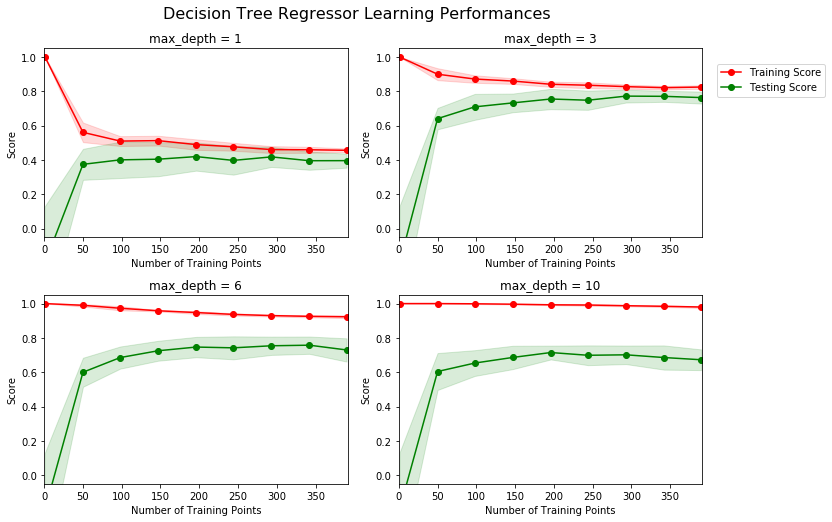

In [8]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### 问题 4 - 学习数据
*选择上述图像中的其中一个，并给出其最大深度。随着训练数据量的增加，训练曲线的评分有怎样的变化？测试曲线呢？如果有更多的训练数据，是否能有效提升模型的表现呢？*
**提示：**学习曲线的评分是否最终会收敛到特定的值？

**答案: **
当max_depth = 3时，最大深度为3。随着训练数据量的增加，训练曲线的评分逐渐下降最终趋于稳定，在0.8左右；随着训练数据量的增加，测试曲线的评分逐渐上升最终依然趋于稳定，也同样在0.8左右；如果有更多的训练数据，不能有效提升模型的表现。理由如下：从图三和图四可以看出，随着最大深度的提高，学习曲线并不会最终收敛到一个特定的值，当深度为6和10时候，发生了过拟合现象，训练样本得分很高而测试样本得分却并不理想。

完善补充：
传统的机器学习算法（又被称为基于统计的机器学习）在数据量达到一定程度后，更多的数据无法提升模型的表现。深度学习的一个优势就是它可以把大量的数据利用起来，提升学习表现。
![图片](https://udacity-reviews-uploads.s3.amazonaws.com/_attachments/3230/1498724415/ml_curve.png)

### 复杂度曲线
下列代码内的区域会输出一幅图像，它展示了一个已经经过训练和验证的决策树模型在不同最大深度条件下的表现。这个图形将包含两条曲线，一个是训练的变化，一个是测试的变化。跟**学习曲线**相似，阴影区域代表该曲线的不确定性，模型训练和测试部分的评分都用的 `performance_metric` 函数。

运行下方区域中的代码，并利用输出的图形并回答下面的两个问题。

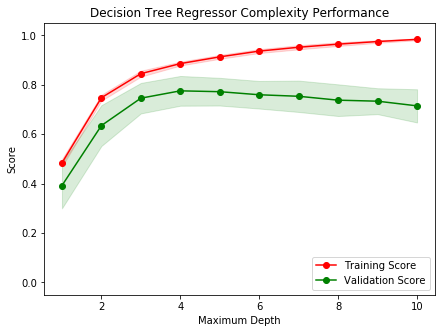

In [9]:
vs.ModelComplexity(X_train, y_train)

### 问题 5- 偏差与方差之间的权衡取舍
*当模型以最大深度 1训练时，模型的预测是出现很大的偏差还是出现了很大的方差？当模型以最大深度10训练时，情形又如何呢？图形中的哪些特征能够支持你的结论？*
  
**提示：** 你如何得知模型是否出现了偏差很大或者方差很大的问题？

**答案: **
①当模型以最大深度 1训练时，模型的预测是出现很大的偏差。图示中当模型以最大深度为1进行训练时候，训练得分和验证得分都很低，仅为0.4-0.5之间。这是因模型不够复杂而无法捕捉基本关系，则会出现偏差。模型一直会系统地错误表示数据，从而导致预测准确率降低，出现欠拟合（underfitting）。

②当模型以最大深度10训练时，模型的预测是出现很大的方差。图示中当模型以最大深度为10进行训练时候，训练得分非常高接近100％，而验证得分仅为70％左右，且曲线的不确定性非常大（阴影大）。这是由于模型过于贴近训练数据，以至于没办法把它的结果泛化（generalize）。而泛化是正事机器学习要解决的问题，如果一个模型只能对一组特定的数据有效，换了数据就无效了，我们就说这个模型过拟合（overfitting）。

你如何得知模型是否出现了偏差很大或者方差很大的问题？
参考周志华老师的西瓜书44-46页，及相应知乎博客等。

补：
**偏差（bias）**：描述的是预测值（估计值）的期望与真实值之间的差距。偏差越大，越偏离真实数据。
**方差（variance）**：描述的是预测值的变化范围，离散程度，也就是离其期望值的距离。方差越大，数据的分布越分散。

补充完善：

   借用西瓜书上的比喻，用机器学习来判断一个物体是不是树叶，underfitting是以为所有绿色的都是树叶（没学会该学的）；overfitting是以为树叶都要有锯齿（学过头了，不该学的也学了进去）。这两者都不是我们想要的。

维基百科对此也有详细的解释 https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff

### 问题 6- 最优模型的猜测
*你认为最大深度是多少的模型能够最好地对未见过的数据进行预测？你得出这个答案的依据是什么？*

**答案: **
我认为最大深度是**4**的模型能够最好敌对未见过的数据进行预测。
依据：从上面的复杂度曲线可以清晰地看出，当最大深度超过4以后，训练得分逐渐升高但是验证得分（测试得分）却逐渐下降，接下来很可能会过拟合。因此将最大深度设为4，既能保证模型的复杂度又可以避免模型的过拟合，是相对最优解。

-----

## 评价模型表现
在这个项目的最后，你将自己建立模型，并使用最优化的`fit_model`函数，基于客户房子的特征来预测该房屋的价值。

### 问题 7- 网格搜索（Grid Search）
*什么是网格搜索法？如何用它来优化学习算法？*


**回答: **[网格搜索（Grid Search）](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)是一种通过遍历给定的参数组合来优化模型表现的方法。通俗来说就是先在较大范围内进行搜索，在得到的优化结果 附近区域再进行精确搜索，通过手动的给出一个模型中你想要改动的所用的参数，程序自动的帮你使用穷举法来将所用的参数都运行一遍。
    网格搜索法是将待搜索参数在一定的空间范围中划分成网格，通过遍历网格中所有的点来寻找最优参数. 这种方法在寻优区间足够大且步距足够小的情况下可以找出全局最优解。
    
    
   ** 补充完善**：
    GridSearch就是把给定参数下所有可能的组合都试一遍，通过指定的评价函数找出最优。同时还要注意，这里的最优也是我们给定参数下，给定 Kfold（如果使用）的K下的最优。参数空间变化和K取值的变化都会引起结果不同，所以即使是GridSearch，也无法保证是绝对最优。


### 问题 8- 交叉验证
- 什么是K折交叉验证法（k-fold cross-validation）？
- 网格搜索是如何结合交叉验证来完成对最佳参数组合的选择的？
- 优化模型时，使用这种方法对网格搜索有什么好处？网格搜索时如果不使用交叉验证会有什么问题？为什么？
- GridSearchCV中的[`'cv_results'`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)属性能告诉我们什么？

**提示：** 在下面 fit_model函数最后加入 `print pd.DataFrame(grid.cv_results_)` 可以帮你查看更多。

**答案: **
    *1  [交叉验证](https://zh.wikipedia.org/wiki/%E4%BA%A4%E5%8F%89%E9%A9%97%E8%AD%89)
    **K次交叉验证**，初始采样分割成K个子样本，一个单独的子样本被保留作为验证模型的数据，其他K-1个样本用来训练。交叉验证重复K次，每个子样本验证一次，平均K次的结果或者使用其它结合方式，最终得到一个单一估测。这个方法的优势在于，同时重复运用随机产生的子样本进行训练和验证，每次的结果验证一次，10次交叉验证是最常用的。

    2.网格搜索是如何结合交叉验证来完成对最佳参数组合的选择的？
    以决策树为例，当我们确定了要使用决策树算法的时候，为了能够更好地拟合和预测，我们需要调整它的参数。在决策树算法中，我们通常选择的参数是决策树的最大深度。于是我们会给出一系列的最大深度的值，比如 {'max_depth': [1,2,3,4,5]}，我们会尽可能包含最优最大深度。
    不过，我们如何知道哪一个最大深度的模型是最好的呢？我们需要一种可靠的评分方法，对每个最大深度的决策树模型都进行评分，这其中非常经典的一种方法就是交叉验证，下面我们就以K折交叉验证为例，详细介绍它的算法过程。
    首先我们先看一下数据集是如何分割的。我们拿到的原始数据集首先会按照一定的比例划分成训练集和测试集。比如以8:2分割的数据集：训练集用来训练我们的模型，它的作用就像我们平时做的练习题；测试集用来评估我们训练好的模型表现如何，它的作用像我们做的高考题，这是要绝对保密不能提前被模型看到的。因此，在K折交叉验证中，我们用到的数据是训练集中的所有数据。
    我们将训练集的所有数据平均划分成K份（通常选择K=10），取第K份作为验证集，它的作用就像我们用来估计高考分数的模拟题，余下的K-1份作为交叉验证的训练集。对于我们最开始选择的决策树的5个最大深度 ，以 max_depth=1 为例，我们先用第2-10份数据作为训练集训练模型，用第1份数据作为验证集对这次训练的模型进行评分，得到第一个分数；然后重新构建一个 max_depth=1 的决策树，用第1和3-10份数据作为训练集训练模型，用第2份数据作为验证集对这次训练的模型进行评分，得到第二个分数……以此类推，最后构建一个 max_depth=1 的决策树用第1-9份数据作为训练集训练模型，用第10份数据作为验证集对这次训练的模型进行评分，得到第十个分数。于是对于 max_depth=1 的决策树模型，我们训练了10次，验证了10次，得到了10个验证分数，然后计算这10个验证分数的平均分数，就是 max_depth=1 的决策树模型的最终验证分数。对于 max_depth = 2,3,4,5 时，分别进行和 max_depth=1 相同的交叉验证过程，得到它们的最终验证分数。然后我们就可以对这5个最大深度的决策树的最终验证分数进行比较，分数最高的那一个就是最优最大深度，对应的模型就是最优模型。
    [参考](https://zhuanlan.zhihu.com/p/25637642)
    
    3.优化模型时，使用这种方法对网格搜索有什么好处？网格搜索时如果不使用交叉验证会有什么问题？为什么？
     **原答案** 如果不使用交叉验证会使所有的样本都被作为了训练集和测试集，每个样本都被验证了一次。网格搜索算法用于系统地遍历多种参数的组合，通过交叉验证来确定最佳效果参数。如果网格搜索时不使用交叉验证则可能使得模型泛化能力无法达到最优。
     
     **修改后**如果使用交叉验证会使所有的样本都被作为了训练集和测试集，每个样本都被验证了一次。当样本被均分为K个数据子集，然后每选中一个数据子集作为训练集，剩下k-1个作为测试集,这样执行K次，最后取平均值，这样就会用了所有的数据。网格搜索算法用于系统地遍历多种参数的组合，通过交叉验证来确定最佳效果参数。  
    交叉验证（Cross Validation）由于将样本的一部分用于训练，另一部分用于验证。因此不仅考虑了训练误差，同时也考虑了泛化误差。它的好处是可以从有限的数据中获得尽可能多的有效信息，从而可以从多个角度去学习样本，避免陷入局部的极值。在这个过程中，无论是训练样本还是测试样本都得到了尽可能多的学习同时可以减小误差，得到相对可靠稳定的模型。
    如果网格搜索时不使用交叉验证，就不会从有限的数据中获得尽可能多的有效信息，也不能从多个角度去学习样本，从而陷入局部的极值。
    
   4.GridSearchCV中的'cv_results'属性能告诉我们什么？
    sklearn模块的GridSearchCV模块，能够在指定的范围内自动搜索具有不同超参数的不同模型组合，有效解放注意力。GridSearchCV模块中，不同超参数的组合方式及其计算结果以字典的形式保存在 clf.cv_results_中，python的pandas模块提供了高效整理数据的方法，‘cv_results_’能够输出一个dict，其中包括相关参数的名称以及对应的值。

### 练习：训练模型
在最后一个练习中，你将需要将所学到的内容整合，使用**决策树演算法**训练一个模型。为了保证你得出的是一个最优模型，你需要使用网格搜索法训练模型，以找到最佳的 `'max_depth'` 参数。你可以把`'max_depth'` 参数理解为决策树算法在做出预测前，允许其对数据提出问题的数量。决策树是**监督学习算法**中的一种。

此外，你会发现你的实现使用的是 `ShuffleSplit()` 。它也是交叉验证的一种方式（见变量 `'cv_sets'`）。虽然这不是**问题8**中描述的 K-Fold 交叉验证，这个教程验证方法也很有用！这里 `ShuffleSplit()` 会创造10个(`'n_splits'`)混洗过的集合，每个集合中20%(`'test_size'`)的数据会被用作**验证集**。当你在实现的时候，想一想这跟 K-Fold 交叉验证有哪些相同点，哪些不同点？

在下方 `fit_model` 函数中，你需要做的是：
- 使用  `sklearn.tree` 中的 [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) 创建一个决策树的回归函数；
  - 将这个回归函数储存到 `'regressor'` 变量中；
- 为 `'max_depth'` 创造一个字典，它的值是从1至10的数组，并储存到 `'params'` 变量中；
- 使用 `sklearn.metrics` 中的 [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html)  创建一个评分函数；
  - 将 `performance_metric` 作为参数传至这个函数中；
  - 将评分函数储存到 `'scoring_fnc'` 变量中；
- 使用 `sklearn.model_selection` 中的 [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 创建一个网格搜索对象；
  - 将变量`'regressor'`, `'params'`, `'scoring_fnc'`, 和 `'cv_sets'` 作为参数传至这个对象中；
  - 将 `GridSearchCV` 存到 `'grid'` 变量中。
  
如果有同学对python函数如何传递多个参数不熟悉，可以参考这个MIT课程的[视频](http://cn-static.udacity.com/mlnd/videos/MIT600XXT114-V004200_DTH.mp4)。

In [10]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
import sklearn as skl
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(estimator = regressor,param_grid = params,scoring = scoring_fnc,cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### 做出预测
当我们用数据训练出一个模型，它现在就可用于对新的数据进行预测。在决策树回归函数中，模型已经学会对新输入的数据*提问*，并返回对**目标变量**的预测值。你可以用这个预测来获取数据未知目标变量的信息，这些数据必须是不包含在训练数据之内的。

### 问题 9- 最优模型
*最优模型的最大深度（maximum depth）是多少？此答案与你在**问题 6**所做的猜测是否相同？*

运行下方区域内的代码，将决策树回归函数代入训练数据的集合，以得到最优化的模型。

In [11]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print ("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


**Answer: **
Parameter 'max_depth' is 4 for the optimal model.

### 问题 10 - 预测销售价格
想像你是一个在波士顿地区的房屋经纪人，并期待使用此模型以帮助你的客户评估他们想出售的房屋。你已经从你的三个客户收集到以下的资讯:

| 特征 | 客戶 1 | 客戶 2 | 客戶 3 |
| :---: | :---: | :---: | :---: |
| 房屋内房间总数 | 5 间房间 | 4 间房间 | 8 间房间 |
| 社区贫困指数（％被认为是贫困阶层） | 17% | 32% | 3% |
| 邻近学校的学生-老师比例 | 15：1 | 22：1 | 12：1 |

*你会建议每位客户的房屋销售的价格为多少？从房屋特征的数值判断，这样的价格合理吗？为什么？* 

**提示：**用你在**分析数据**部分计算出来的统计信息来帮助你证明你的答案。

运行下列的代码区域，使用你优化的模型来为每位客户的房屋价值做出预测。

In [12]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $391,183.33
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67


In [13]:
print(data.describe()) #针对x轴（各列）的统计汇总

               RM       LSTAT     PTRATIO          MEDV
count  489.000000  489.000000  489.000000  4.890000e+02
mean     6.240288   12.939632   18.516564  4.543429e+05
std      0.643650    7.081990    2.111268  1.653403e+05
min      3.561000    1.980000   12.600000  1.050000e+05
25%      5.880000    7.370000   17.400000  3.507000e+05
50%      6.185000   11.690000   19.100000  4.389000e+05
75%      6.575000   17.120000   20.200000  5.187000e+05
max      8.398000   37.970000   22.000000  1.024800e+06


In [14]:
print(data.var())  #方差
print(data.std())  #标准差

RM         4.142850e-01
LSTAT      5.015458e+01
PTRATIO    4.457450e+00
MEDV       2.733741e+10
dtype: float64
RM              0.643650
LSTAT           7.081990
PTRATIO         2.111268
MEDV       165340.277653
dtype: float64


**答案: **

Predicted selling price for Client 1's home: $391,183.33
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67

我会建议第一位顾客的房屋销售价格定为$391,183.33，第二位顾客的房屋销售价格定为$189,123.53，第三位顾客的房屋销售价格定为$942,666.67。
    通过'RM'、'LSTAT' 和'PTRATIO'三者和'prices'的关系以及通过describe函数统计到的相关值可以得出：
房屋内房间总数和房屋销售价格基本成正比，从房屋内房间角度看预测的价格合理。
同理，社区贫困指数越高则价格应该越低，价格符合这一趋势，依旧合理。
邻近学校的学生老师比例对房价没有明显影响，但从三者的数值分布来看，也基本符合价格的趋势。

   从数据集的统计信息可以分析出：
Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13
   
   
   
|  --    |RM    |   LSTAT  |   PTRATIO    |    MEDV|
|  :----: |  :----:   |   :----:     |    :----: |
|count  |489.000000|  489.000000 | 489.000000 | 4.890000e+02|
|mean  |   6.240288  | 12.939632  | 18.516564 | 4.543429e+05|
|std    |  0.643650   | 7.081990  |  2.111268 | 1.653403e+05|
|min   |   3.561000   | 1.980000  | 12.600000 | 1.050000e+05|
|25%    |  5.880000   | 7.370000  | 17.400000  |3.507000e+05|
|50%   |   6.185000  | 11.690000  | 19.100000 | 4.389000e+05|
|75%   |   6.575000   |17.120000 |  20.200000 |5.187000e+05|
|max  |    8.398000  | 37.970000  | 22.000000 | 1.024800e+06|
    房价范围在1.050000e+05到 1.024800e+06之间，预测到的价格基本也在这一范围之内。此外，通过最大值最小值均值等也可以验证得出价格的合理性。
    
综上述，从房屋的各个特征的数值可以判断，这样的价格很合理。

### 敏感度

一个最优的模型不一定是一个健壮模型。有的时候模型会过于复杂或者过于简单，以致于难以泛化新增添的数据；有的时候模型采用的学习算法并不适用于特定的数据结构；有的时候样本本身可能有太多噪点或样本过少，使得模型无法准确地预测目标变量。这些情况下我们会说模型是欠拟合的。执行下方区域中的代码，采用不同的训练和测试集执行 `fit_model` 函数10次。注意观察对一个特定的客户来说，预测是如何随训练数据的变化而变化的。

In [33]:
# 如果你在 fit_model 函数里使用了 print pd.DataFrame(grid.cv_results_) 请注释掉这行之后再运行本代码
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### 问题 11 - 实用性探讨
*简单地讨论一下你建构的模型能否在现实世界中使用？* 

**提示：** 回答几个问题，并给出相应结论的理由：
- *1978年所采集的数据，在今天是否仍然适用？*
- *数据中呈现的特征是否足够描述一个房屋？*
- *模型是否足够健壮来保证预测的一致性？你需要参考上面敏感度部分的结果来解释你的结论。*
- *在波士顿这样的大都市采集的数据，能否应用在其它乡镇地区？*

**答案: **

①1978年所采集的数据，在今天是否仍然适用？
    我觉得1978年采集的数据不太适用了。毕竟距今三十九年，在漫长的历史进程中世事变迁沧海桑田。今天的社会环境，经济技术发展情况，政治条件，人们消费水平和理念等等都和39年前发生了巨大的改变。此外，我认为采集的数据过少，特征数量仅为三个也比较少不能准确刻画出房屋的特征，构建模型过程中容易发生欠拟合的现象。因此我认为1978年的数据在今天不适用。

②数据中呈现的特征是否足够描述一个房屋？
    数据中呈现的特征不足够描述一个房屋。我认为仅仅凭借这三个因素来描述房屋并不完备。影响房屋价格的因素有太多，除了列举的三个以外，我认为还应该有：
    小区本身：所处的地段，日照，风向，是否为学区房，周围配套设施，交通情况，房屋的品质，小区绿化，物业服务好坏，周围人口素质，周围是否有噪声……
    房屋本身：楼层，房龄，朝向，户型，家庭规模，房屋面积，布局，视野景观，装修情况，采光，风水，……
    其他：国家政策，经济发展，物价水平，居民收入……
    
③模型是否足够健壮来保证预测的一致性？你需要参考上面敏感度部分的结果来解释你的结论。
    我认为模型健壮。
    从上面敏感度部分的结果可以看出，对一个特定的客户来说，预测结果会随训练数据的改变而改变，但是最终的趋势比较稳定。
Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39

④在波士顿这样的大都市采集的数据，能否应用在其它乡镇地区？
    在波士顿这样的大都市采集的数据，不能应用在其它乡镇地区。
    理由：波士顿为都市，和乡镇在经济政治文化等方面还是有很大差异，在波士顿采集的数据集只能应用在当时的波士顿，所构建的模型也只能反映出波士顿的房价特征。如果想应用在其他乡镇，我认为应重新采集数据，重新构建符合乡镇特色的模型。


补充：
这里价格变化占房间约14%，幅度还是挺大的。通常也被认为是模型不健壮的表现。即不同的数据切分构建的模型预测同一个点差别比较大。

### 可选问题 - 预测北京房价

（本题结果不影响项目是否通过）通过上面的实践，相信你对机器学习的一些常用概念有了很好的领悟和掌握。但利用70年代的波士顿房价数据进行建模的确对我们来说意义不是太大。现在你可以把你上面所学应用到北京房价数据集中`bj_housing.csv`。

免责声明：考虑到北京房价受到宏观经济、政策调整等众多因素的直接影响，预测结果仅供参考。

这个数据集的特征有：
- Area：房屋面积，平方米
- Room：房间数，间
- Living: 厅数，间
- School: 是否为学区房，0或1
- Year: 房屋建造时间，年
- Floor: 房屋所处楼层，层

目标变量：
- Value: 房屋人民币售价，万

你可以参考上面学到的内容，拿这个数据集来练习数据分割与重排、定义衡量标准、训练模型、评价模型表现、使用网格搜索配合交叉验证对参数进行调优并选出最佳参数，比较两者的差别，最终得出最佳模型对验证集的预测分数。

In [34]:
### 你的代码
# Import libraries necessary for this project
# 载入此项目所需要的库
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.model_selection import ShuffleSplit

# Pretty display for notebooks
# 让结果在notebook中显示
%matplotlib inline

# Load the Boston housing dataset
# 载入波士顿房屋的数据集
data = pd.read_csv('bj_housing.csv')
prices = data['Value']
features = data.drop('Value', axis = 1)
    
# Success
# 完成
print ("Beijing housing dataset has {} data points with {} variables each.".format(*data.shape))


Beijing housing dataset has 9999 data points with 7 variables each.


In [35]:
# TODO: Minimum price of the data
#目标：计算价值的最小值
minimum_price = min(prices)

# TODO: Maximum price of the data
#目标：计算价值的最大值
maximum_price = max(prices)

# TODO: Mean price of the data
#目标：计算价值的平均值
mean_price = np.mean(prices)

# TODO: Median price of the data
#目标：计算价值的中值
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
#目标：计算价值的标准差
std_price = np.std(prices)

# Show the calculated statistics
#目标：输出计算的结果
print ("Statistics for Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $66.00
Maximum price: $7,450.00
Mean price: $342.08
Median price $280.00
Standard deviation of prices: $259.39


In [36]:
# TODO: Import 'r2_score'
import sklearn
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = sklearn.metrics.r2_score(y_true,y_predict)
    
    # Return the score
    return score

In [37]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features,prices,test_size = 0.2,random_state=0)

# Success
print ("Training and testing split was successful.")

Training and testing split was successful.


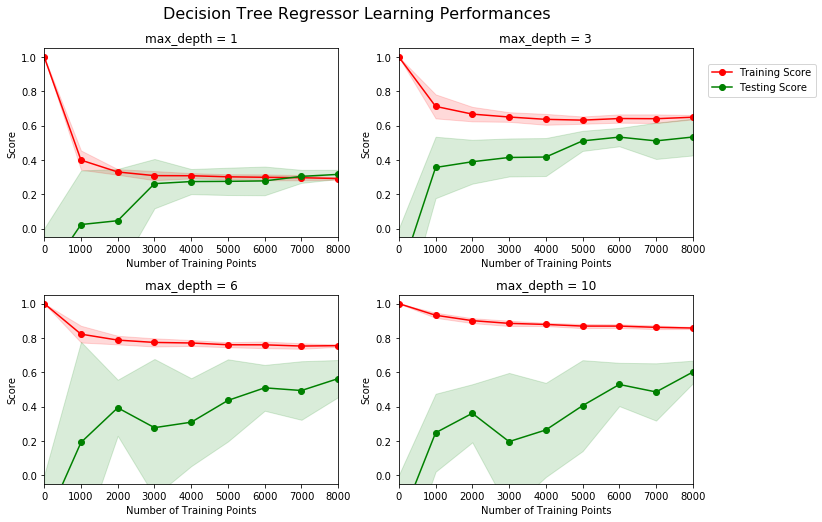

In [38]:
 #Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

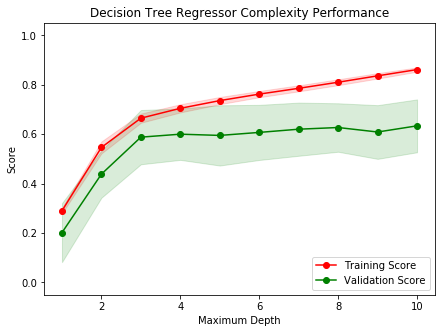

In [39]:
vs.ModelComplexity(X_train, y_train)

In [40]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
import sklearn as skl
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(estimator = regressor,param_grid = params,scoring = scoring_fnc,cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [41]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print ("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 8 for the optimal model.


你成功的用新的数据集构建了模型了吗？他能对测试数据进行验证吗？它的表现是否符合你的预期？交叉验证是否有助于提升你模型的表现？

**答案：**
我几乎完全仿照波士顿房价预测的模型进行北京房价的预测。我用新的数据集构建了模型并对测试数据进行了验证，它的表现非常符合我的预期，交叉验证有助于提升我的模型的表现。通过交叉验证，最后得出当最大深度为8的时候可以得到最优模型。

如果你是从零开始构建机器学习的代码会让你一时觉得无从下手。这时不要着急，你要做的只是查看之前写的代码，把每一行都看明白，然后逐步构建你的模型。当中遇到什么问题也可以在我们论坛寻找答案。也许你会发现你所构建的模型的表现并没有达到你的预期，这说明机器学习并非是一项简单的任务，构建一个表现良好的模型需要长时间的研究和测试。这也是我们接下来的课程中会逐渐学到的。